In [36]:
import keras


In [37]:
import numpy


In [38]:
from keras.datasets import imdb

In [39]:
from matplotlib import pyplot

In [40]:
(x_train,y_train), (x_test,y_test)= imdb.load_data()

In [41]:
x=numpy.concatenate((x_train,x_test),axis=0)
y=numpy.concatenate((y_train,y_test),axis=0)

In [42]:
#summarize the size
print("training_data:")
print(x.shape)
print(y.shape)

training_data:
(50000,)
(50000,)


In [43]:
#summarize number of words
print(len(numpy.unique(numpy.hstack(x))))

88585


mean 234.76 words ( 172.911495)


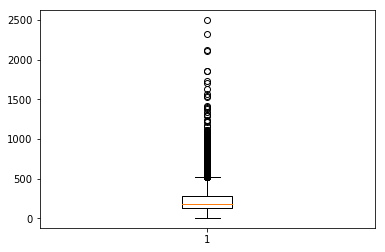

In [46]:
result=[len(x) for x in x]
print("mean %.2f words ( %f)" % (numpy.mean(result),numpy.std(result)))
#plot review length
pyplot.boxplot(result)
pyplot.show()

In [60]:
imdb.load_data(nb_words=5000)

C:\Users\See tha\Anaconda3\lib\site-packages\keras\datasets\imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


((array([ list([1, 121, 81, 36, 79, 4, 278, 8, 97, 108, 40, 14, 13, 384, 225, 164, 1653, 44, 14, 22, 600, 7, 4, 156, 26, 573, 4, 487, 9, 394, 4, 1381, 9, 2, 4, 65, 2, 200, 112, 6, 78, 310, 7, 2, 132, 5, 6, 2, 1010, 5, 4, 116, 9, 1297, 18, 294, 37, 3631, 32, 2572, 7, 22, 52, 5, 78, 13, 215, 974, 15, 14, 22, 9, 44, 4, 249, 207, 110, 237, 1274, 7, 4, 744, 84, 145, 11, 4, 3707, 13, 92, 66, 40, 8, 1157, 4, 781, 7, 84, 269, 8, 987, 49, 722, 42, 1827, 2, 498, 21, 14, 22, 62, 306, 8, 1271, 8, 57, 31, 4, 65, 2, 23, 6, 2, 2, 7, 6, 415, 871, 6, 78, 310, 7, 4, 2, 1357, 2, 261, 29, 2, 53, 40, 6, 915, 2, 209, 4, 861, 2, 4, 78, 493, 28, 8, 768, 56, 19, 4, 52, 493, 11, 6, 513, 121, 36, 26, 2103, 8, 1090, 39, 193, 12, 39, 50, 17, 15, 2940, 9, 4, 118, 173, 61, 2017, 9, 15, 894, 25, 26, 83, 78, 2, 2342, 487, 2631, 116, 5, 2332, 2775, 25, 80, 118, 30, 3009, 34, 1200, 14, 31, 23, 4, 4200, 54, 335, 46, 2753, 3364]),
         list([1, 3614, 261, 29, 70, 81, 4, 2, 2102, 9, 6, 601, 3463, 17, 35, 284, 10, 10, 1

In [62]:
from keras.layers import Embedding

from keras.preprocessing import sequence

from keras.preprocessing.sequence import pad_sequences
pad_sequences




<function keras.preprocessing.sequence.pad_sequences>

In [64]:


x_train =pad_sequences(x_train, maxlen=500)
x_test = pad_sequences(x_test, maxlen=500)


In [65]:
Embedding (5000,32, input_length=500)

In [66]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [67]:


# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


In [68]:
#We will bound reviews at 500 words, truncating longer reviews and zero-padding shorter reviews.


max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [69]:



# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:


# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
